<a href="https://colab.research.google.com/github/mra49/Capstone/blob/main/capstonePostUnifyingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###3-4)product_type cleaning for remington brand

In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("/content/drive/MyDrive/data/checkpoint_before_spaCy_eval.csv")

<ipython-input-71-caa7c61e0865>:1: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/data/checkpoint_before_spaCy_eval.csv")


In [72]:
df_rem = pd.read_csv("/content/drive/MyDrive/data/df_brand_remington dictionary.csv")

In [73]:
df_rem.columns

Index(['Item Number', 'Item Description', 'Brand', 'remington_codes',
       'product_type'],
      dtype='object')

In [74]:
# Filter df_rem for rows where the brand is 'Remington'
remington_df_rem = df_rem[df_rem['Brand'].str.lower() == 'remington']

# Create a dictionary mapping Item Number to product_type for Remington items
remington_product_type_dict = pd.Series(remington_df_rem['product_type'].values,
                                        index=remington_df_rem['Item Number']).to_dict()
item_dict = remington_product_type_dict

In [75]:
print(remington_product_type_dict)

{'1604509': 'Hair Straightner', '3326558': 'women shaver ', '1602944': 'Hair Straightner', '1602739': 'Hair Dryer', '334302': 'men shaver ', '1602746': 'Hair Dryer', '165015': 'Stylist', '168015': 'Hair Curler', '356772': 'Women Shaver', '168012': 'Hair Straightner', '1604503': 'Hair Curler', '3326527': 'Men Shaver', '168014': 'Hair Curler', '1602722': 'Hair Dryer', '1602753': 'Hair Dryer', '3514123': 'Women Shaver', '3304471': 'Men Shaver', '1604502': 'Hair Curler', '356771': 'Nail kit', '334286': 'Men Shaver ', '1623819': 'stylist', '1637700': 'Hair Straightner', '168009': 'Hair Dryer', '3346104': 'Women Shaver', '120035': 'hair brush ', '3342907': 'Men Shaver', '1604501': 'Hair Curler', '1623826': 'Hair Curler', '168001': 'Hair Dryer', '3300122': 'Men Shaver', '334022': 'Men Shaver', '33184': 'Men Shaver', '3300124': 'Men Shaver', '3300125': 'Men Shaver', '3300126': 'Men Shaver', '168959': 'Hair Straightner', '1602723': 'Hair Straightner', '1690668': 'Hair Straightner', '1647271': '

In [76]:
item_dict = {str(key): value for key, value in item_dict.items()}

# Load or define your DataFrame 'df'
# df = pd.read_csv('your_file.csv') or continue with your existing DataFrame

# Ensure the 'Item Number' column is of string type
df['Item Number'] = df['Item Number'].astype(str)

# Optional: Strip any leading/trailing spaces
df['Item Number'] = df['Item Number'].str.strip()

# Create a mask for rows where Item Number is in the dictionary
mask = df['Item Number'].isin(item_dict.keys())

# Apply the mapping only to rows where the mask is True
df.loc[mask, 'product_type'] = df.loc[mask, 'Item Number'].map(item_dict)

In [77]:
# Assuming df is your original DataFrame and it's already loaded

# Filter df for rows where the brand is 'Remington' and select only 'Item Number' and 'product_type'
df_check = df[['Item Number', 'product_type']]

# Display the first few rows of df_check
print(df_check.head())
df_check.to_csv("check_remsPT.csv", index = False)

  Item Number      product_type
0     1604509  Hair Straightner
1       56240              mask
2       56938        shower gel
3       56960        shower gel
4       57332               NaN


In [78]:
df.to_csv("df", index = False)

###3-5)Clean Brand product_type Category and Subcategory

In [79]:
# Rename the column
df.rename(columns={'Unified Description': 'Unified IN'}, inplace=True)

####3-5.1)quick Brand Cleaning

In [80]:
df['Brand'] = df['Brand'].replace('cleannet', 'clean net')

to_replace_brand = {
    "Keplex": ["semi prmnnt", "shampoo","keplex"],
    "babyliss" : ["electrical"],
    "reflet argin": ["reflet arg"],
    "vitality": ["tubes"],
    "k.keratin": ["conditioner","keratine", "coloration"]

}
# Replace values in 'Brand',
for new_value, old_values in to_replace_brand.items():
    df['Brand'].replace(old_values, new_value, inplace=True)

In [81]:
import pandas as pd

# Assuming your DataFrame is named df and is already loaded

# Function to update the Brand based on Item Description
def update_brand(row):
    if row['Item Description'].lower().startswith('wahl'):
        return 'wahl'
    return row['Brand']

# Apply the function to each row
df['Brand'] = df.apply(update_brand, axis=1)

# Now df will have the 'Brand' updated to 'wahl' where the Item Description starts with 'wahl'


In [82]:
# Count the occurrences of each unique value in the 'Brand' column
brand_counts = df['Brand'].value_counts()

# Display the counts
print(brand_counts)

style           42013
foamy           38922
clean net       12448
hawai            8768
remington         517
Keplex            151
wahl              110
k.keratin         109
vitality           90
reflet argin       84
treatment          70
babyliss           60
justformen         35
marvelisse         16
gl/cr/serum        14
elect stra         14
straightnr         11
cover spray        11
make-up            11
shaver mchn        10
oxydant             9
onemon col          9
men section         9
serum               8
mim                 6
wellness            6
curling mac         6
caviarine           5
h.accessor          5
wax                 4
scissors            4
promo item          4
h.r.machine         4
hairdrs bag         3
face care           3
promotion           3
mask/oil            3
fresheners          3
promo               2
wax machine         2
combs               2
rmvl paste          2
h.extension         2
glowy               2
gent                1
krys-krtn 

####3.5-2)product_type cleaning

In [83]:
import pandas as pd

# Load your DataFrame 'df'

# List of specific product types to replace with 'shampoo'
to_replace = [
    "shampoo", "sh.", "sh", "shampo", "shampoo1.125l*2",
    "shanpoo", "shamp", "sham", "sh.gallon", "sh/gel",
    "shamp.meridian", "sha."
]

# Replace each instance in 'product_type' with 'shampoo'
df['product_type'] = df['product_type'].replace(to_replace, 'shampoo')

In [84]:
#dishwashing
to_replace = [
    "dishwash", "dishwashing liquid","dishwashing","dishwasing","dishwash+hand soap"
]
# Replace each instance in 'product_type' with 'shampoo'
df['product_type'] = df['product_type'].replace(to_replace, 'dishwashing')


#laundry
to_replace = [
    "laundry", "laundry power", "laundry gel"
]
df['product_type'] = df['product_type'].replace(to_replace, 'laundry gel')


#fabric softner
df['product_type'] = df['product_type'].replace('fabric siftner', 'fabric softner')


#hand soap
to_replace = [
    "hnd sop", "hnd sp","hndsoap","1l*2+hand soap","handsoap"
]
df['product_type'] = df['product_type'].replace(to_replace, 'hand soap')


#shower gel
df['product_type'] = df['product_type'].replace("showergel", 'shower gel')


#fabric softner
df['product_type'] = df['product_type'].replace("fabric softener", 'fabric softner')

replacement_dict = {
    "bathroom cleaner": ["bathroom cleaner+sur", "bathroom cleaning", "antibacterial bathro"],
    "toilet cleaner": ["toilet gel cleaner"],
    "alcohol": ["alcohol spray", "pure alcohol"],
    "oxidant": ["oxydant"],
    "flash": ["flush"],
    "disinfectant": ["disinfectant cleaner", "bowl disinfectant"],
    "hair conditioner": ["conditioner", "bone marrow conditioning", "anti-oxidant conditioner", "conditioning mask",
                        "shampoo &conditioner", "bone marrow conditioning mask", "straightening conditioner",
                        "collagen conditioner", "salon conditioner", "anti-oxidant conditi", "cond", "cond mask"],
    "hair remover": ["r.was", "wax", "hair remov"],
    "thinning scissors" : ["thng.scrs"],
    "developer cream" : ["dev.cream"],
    "hair dye": ["vitality hair dye"],
    "keratin": ["keratin serum", "keratine collagen","k.keratine collagen"],
    "glass cleaner" : ["hostpital"],
    "lice remover" : ["cream"]
}

df['product_type'] = df['product_type'].replace("cream", 'lice remover')
# Replace values in 'product_type'
for new_value, old_values in replacement_dict.items():
    df['product_type'].replace(old_values, new_value, inplace=True)

####3.5-3) create Category and Subcategory Columns in df

In [85]:
df['product_type'] = df['product_type'].str.lower().str.strip()

In [86]:
#check
# Convert the 'product_type' column to lowercase
df['product_type'] = df['product_type'].str.lower()

# Count the occurrences of each unique value in the 'Brand' column
type_counts = df['product_type'].value_counts()

# Display the counts
df_productDistnCounts = type_counts.to_csv("df_product_check.csv")
print(type_counts)

shampoo             45354
dishwashing         19656
laundry gel          7048
general cleaner      4678
hand soap            4421
                    ...  
housing comple          1
fascinelle spray        1
anti-oxidant            1
lith clipper            1
cooling spray           1
Name: product_type, Length: 226, dtype: int64


we used df_productDistnCounts to create the dictionary by manually assigning distinct product types a category and subcategory. Its not the ideal approach but its the best course of action given the immense accuracy and work put into the cleaning process so far.

In [87]:
df_PT_dict = pd.read_csv("/content/drive/MyDrive/Capstone/df_type_dict.csv")

# Convert all values in 'product_type' column to lowercase and strip leading/trailing spaces
df_PT_dict['product_type'] = df_PT_dict['product_type'].str.lower().str.strip()
df_PT_dict['product_type'] = df_PT_dict['product_type'].replace("keratine collagen", "keratin")
df_PT_dict['product_type'] = df_PT_dict['product_type'].replace("thng. scrs", "thinning scissors")

#Category
df_PT_dict['Category '] = df_PT_dict['Category '].replace("Persnoal Care", "Personal Care")

###
replacement_dict = {
    "Personal Care" : ["Persnoal Care", "Personal Care or Household Cleaning", "Beauty and Cosmetics or Health", "Personal Care or Art Supplies"],
    "Others": ["Pet Supplies", "Hardware or Industrial", "Personal Care or Health", "Industrial or Household", "Stationery or Education", "Electronics or Construction"]

}

# Replace values in 'product_type'
for new_value, old_values in replacement_dict.items():
    df_PT_dict['Category '].replace(old_values, new_value, inplace=True)


In [88]:
# Get unique product_type values from df_PT_dict
unique_product_types_df_PT_dict = set(df_PT_dict['product_type'].unique())

# Get unique product_type values from df
unique_product_types_df = set(df['product_type'].unique())

# Find product_type values in df_PT_dict not present in df
product_types_not_in_df = unique_product_types_df_PT_dict - unique_product_types_df

# Print the product types not present in df
print("Product types in df_PT_dict not present in df:")
for product_type in product_types_not_in_df:
    print(product_type)


Product types in df_PT_dict not present in df:
thinning scissors


In [89]:
import pandas as pd

# Assuming df and df_PT_dict are already loaded

# Create mappings for Category and Subcategory from df_PT_dict
category_mapping = df_PT_dict.set_index('product_type')['Category '].to_dict()
subcategory_mapping = df_PT_dict.set_index('product_type')['Subcategory '].to_dict()

# Map the values to df
df['Category'] = df['product_type'].map(category_mapping)
df['Subcategory'] = df['product_type'].map(subcategory_mapping)


In [90]:
########## very important check point  ############
df.to_csv("df_postUnify_PreRFM.csv", index = False)

make sure that no product_type value is not present in the dictionary to avoid any faults in the data

###3.6) Extra Cleaning (Location)

do we add admin to intercompany

In [91]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Get unique values from the 'Location ID' column
unique_location_ids = df['Location ID'].unique()
print(unique_location_ids.sum)
# Print the unique values
print("Unique Location IDs:")
print(unique_location_ids)

<built-in method sum of numpy.ndarray object at 0x7f7d74f929d0>
Unique Location IDs:
['slska1' 'intercompany' 'slssth2' 'sprvsrsth' 'sprvsrbek' 'slsbek2'
 'slsptc02m2' 'admin' 'slssbr' 'slsdbs' 'slsbrt' 'salons' 'slsmtn'
 'pharmacies' 'export' 'slsmtn-ksn' 'sprvsrnor' 'slsksn-jbl' 'SLSSBR'
 'SLSBRT' nan]


In [92]:
location_dic = {
    "all branches" : ["Slska1"],
    "South" : ["slssth2"],
    "North" : ["sprvsrnor"],
    "Baalbek-Hermel": ["slsbek2"],
    "Beirut" : ["slsbrt","SLSBRT"],
    "Beqaa" : ["sprvsrbek",],
    "Kesrwen-Jbeil" : ["slsmtn-ksn","slsksn-jbl","slsmtn"],
    "Mount Lebanon": ["slssbr", "SLSSBR"],
    "Nabatieh" : ["sprvsrsth"],
    "intercompany" : ["slsptc02m2"]
}
for new_value, old_values in location_dic.items():
    df['Location ID'].replace(old_values, new_value, inplace=True)

In [93]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Count the number of distinct items
distinct_Locations = df['Location ID'].nunique()

# Print the count of distinct items
print(f"There are {distinct_Locations} distinct items.")


There are 15 distinct items.


###3.7) Extra columns

In [94]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Function to check for a plus sign in the item description
def check_offer(description):
    return 1 if '+' in description else 0

# Apply the function to create the 'With Offer' column
df['With Offer'] = df['Item Description'].apply(check_offer)

# Count the number of items with and without offers
offer_counts = df['With Offer'].value_counts()

# Print the counts
print("Number of items with offers:", offer_counts.get(1, 0))
print("Number of items without offers:", offer_counts.get(0, 0))


Number of items with offers: 3342
Number of items without offers: 100237


In [95]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Convert 'Document Date' to datetime if it's not already
df['Document Date'] = pd.to_datetime(df['Document Date'])

# Extract day, month, and year
df['Day'] = df['Document Date'].dt.day
df['Month'] = df['Document Date'].dt.month
df['Year'] = df['Document Date'].dt.year

# Now df will have new columns 'Day', 'Month', and 'Year'


In [96]:
print(df[['Document Date', 'Day', 'Month', 'Year']].iloc[4459]) #working well

Document Date    2020-02-27 00:00:00
Day                               27
Month                              2
Year                            2020
Name: 4459, dtype: object


###3.8) Customer Names Cleaning

##RFM Analysis

In [97]:
# create a dataset solely for working on RFM analysis
df_rfm = df

In [98]:
#here we're going to remove ID's own retailers
import pandas as pd

# Define your multiple conditions
customer_names = ['customers cash/wtc03', 'customers cash/', 'customers cash_']
location_ids = ['intercompany', 'admin', 'slsdbs', 'slsptc02m2']


# Filter df_frm based on these conditions
condition = df_rfm['Customer Name'].isin(customer_names) | df_rfm['Location ID'].isin(location_ids)
filtered_df = df_rfm[condition]

# Create list of unique customer numbers
unique_customer_numbers = filtered_df['Customer Number'].unique()

# Drop these customers from df_rfm
df_rfm = df_rfm[~df_rfm['Customer Number'].isin(unique_customer_numbers)]


In [99]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Group by 'Item Description' and sum the 'Extended Price'
grouped_data = df_rfm.groupby('Item Description')['Extended Price'].sum().reset_index()

# Rename the columns for clarity
grouped_data.columns = ['Item Description', 'Total Extended Price']

#sort data
sorted_data = grouped_data.sort_values(by='Total Extended Price', ascending=False)

# Output the result
print(sorted_data.head())


                   Item Description  Total Extended Price
72            foamy dishwash 6000ml          2.172554e+06
102      foamy laundry power gel 5l          2.154178e+06
181  style apple blossom sh. 4000ml          1.300975e+06
226  style shampoo cool ocean 4000m          1.218185e+06
91     foamy general cleaner 6000ml          1.196581e+06


In [100]:
####### calculating the R F and M for our Customers  ###########
import pandas as pd
from datetime import datetime

# Assuming your DataFrame is named df_rfm and it's already loaded
# Also, assuming 'Document Date' is in a standard date format like 'YYYY-MM-DD'

# Convert 'Document Date' to datetime
df_rfm['Document Date'] = pd.to_datetime(df_rfm['Document Date'])

# Determine your analysis date - typically one day after your latest date in the dataset
latest_date = df_rfm['Document Date'].max() + pd.Timedelta(days = 1)

# Calculate Recency (days since last purchase)
recency = df_rfm.groupby('Customer Number')['Document Date'].max()
recency = (latest_date - recency).dt.days
recency = recency.reset_index()
recency.columns = ['Customer Number', 'Recency']

#Calculate Frequency (number of unique invoices per customer)
frequency = df_rfm.groupby('Customer Number')['SOP Number'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['Customer Number', 'Frequency']

# Calculate Monetary (total money spent)
monetary = df_rfm.groupby('Customer Number')['Extended Price'].sum()  # Replace 'Extended Price' with your monetary column name
monetary = monetary.reset_index()
monetary.columns = ['Customer Number', 'Monetary']

# Merge the recency, frequency, and monetary dataframes
df_rfm_segment = pd.merge(recency, frequency, on='Customer Number')
df_rfm_segment = pd.merge(df_rfm_segment, monetary, on='Customer Number')

# Display the first few rows of the RFM table
print(df_rfm_segment.head())


  Customer Number  Recency  Frequency   Monetary
0      000c001843      931          3    887.013
1      000c002061      263         10  22773.877
2      000c002093      127         10   4362.490
3      000c002097       98         15  13162.803
4      000c002129        9          4   2541.310


<ipython-input-100-501992d6add2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Document Date'] = pd.to_datetime(df_rfm['Document Date'])


In [101]:
# Assuming df_rfm_segment is your DataFrame with columns 'Customer Number' and 'Frequency'

# Group by 'Customer Number' and calculate the sum of frequency for each customer
customer_frequency = df_rfm_segment.groupby('Customer Number')['Frequency'].sum()

# Convert the series to a DataFrame and reset the index
customer_frequency_df = customer_frequency.reset_index()

# Rename columns for clarity
customer_frequency_df.columns = ['Customer Number', 'Frequency Score']

# Sort the DataFrame by 'Frequency Score' in descending order
customer_frequency_df = customer_frequency_df.sort_values(by='Frequency Score', ascending=False)

# Display the resulting DataFrame
print(customer_frequency_df.head())


    Customer Number  Frequency Score
414      000c025095              472
121      000c015149               80
423      000c025213               70
73       000c009919               61
702      000c040310               61


In [105]:
# Count the number of records in each bin for R_Score, F_Score, and M_Score
r_score_counts = df_rfm_segment['R_Score'].value_counts().sort_index()
f_score_counts = df_rfm_segment['F_Score'].value_counts().sort_index()
m_score_counts = df_rfm_segment['M_Score'].value_counts().sort_index()

# Print the counts
print("Recency Score Counts:\n", r_score_counts)
print("\nFrequency Score Counts:\n", f_score_counts)
print("\nMonetary Score Counts:\n", m_score_counts)

Recency Score Counts:
 5    314
4    309
3    312
2    311
1    310
Name: R_Score, dtype: int64

Frequency Score Counts:
 1    506
2    339
3    312
4    230
5    169
Name: F_Score, dtype: int64

Monetary Score Counts:
 1    312
2    311
3    311
4    311
5    311
Name: M_Score, dtype: int64


In [102]:
# Define custom bins for Frequency based on business logic
bins = [0, 2, 6, 12, 20, df_rfm_segment['Frequency'].max()]
labels = [1, 2, 3, 4, 5]

# Assign the Frequency scores based on the bins
df_rfm_segment['F_Score'] = pd.cut(df_rfm_segment['Frequency'], bins=bins, labels=labels)


# Recency Binning with qcut
# Note: For Recency, lower values are better, so we reverse the labels
df_rfm_segment['R_Score'] = pd.qcut(df_rfm_segment['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Monetary Binning with qcut
df_rfm_segment['M_Score'] = pd.qcut(df_rfm_segment['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')


In [103]:
# Create a combined RFM score
df_rfm_segment['RFM_Score'] = df_rfm_segment['R_Score'].astype(str) + df_rfm_segment['F_Score'].astype(str) + df_rfm_segment['M_Score'].astype(str)

# Apply the segmentation function
df_rfm_segment['Segment'] = df_rfm_segment['RFM_Score'].apply(rfm_segment)

# Verify the result
print(df_rfm_segment[['Customer Number', 'RFM_Score', 'Segment']].head())


  Customer Number RFM_Score              Segment
0      000c001843       122       Need Attention
1      000c002061       335       About To Sleep
2      000c002093       333       About To Sleep
3      000c002097       444            Champions
4      000c002129       522  Potential Loyalists


In [104]:
def rfm_segment(rfm_score):
    r, f, m = rfm_score
    if r >= '4' and f >= '4' and m >= '4':  # High value in all three areas
        return 'Champions'
    elif f >= '4' and m >= '3':  # Consistently high frequency & good monetary value
        return 'Loyal Customers'
    elif r >= '4' and f >= '2' and m >= '2':  # Newer customers with balanced frequency & monetary value
        return 'Potential Loyalists'
    elif r >= '4':  # Recent customers but lower frequency and monetary value
        return 'New Customers'
    elif r <= '2' and f >= '3' and m >= '3':  # Once regular but haven't purchased recently
        return 'At Risk'
    elif r <= '2' and f <= '2' and m <= '2':  # Lower recency, frequency, and monetary values
        return 'Need Attention'
    else:  # Low in all three areas
        return 'About To Sleep'

# Apply the segmentation function
df_rfm_segment['Segment'] = df_rfm_segment['RFM_Score'].apply(rfm_segment)

# Verify the results
print(df_rfm_segment[['Customer Number', 'RFM_Score', 'Segment']].head())


  Customer Number RFM_Score              Segment
0      000c001843       122       Need Attention
1      000c002061       335       About To Sleep
2      000c002093       333       About To Sleep
3      000c002097       444            Champions
4      000c002129       522  Potential Loyalists


In [108]:
# Count the number of customers in each RFM segment
segment_distribution = df_rfm_segment['Segment'].value_counts()

# Display the distribution
print(segment_distribution)


About To Sleep         384
Need Attention         280
Champions              232
Potential Loyalists    212
Loyal Customers        167
New Customers          167
At Risk                114
Name: Segment, dtype: int64


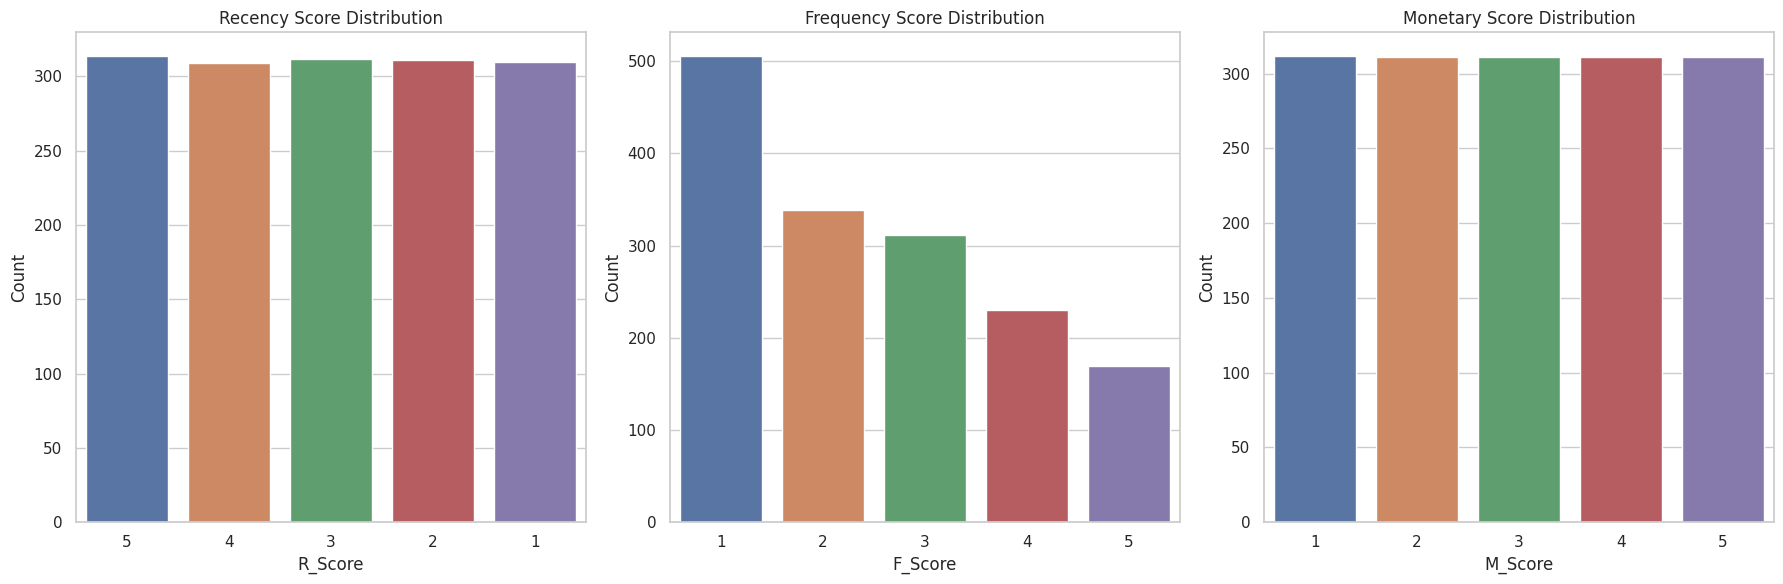

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Recency Score Counts
sns.barplot(x=r_score_counts.index, y=r_score_counts.values, ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('R_Score')
axes[0].set_ylabel('Count')

# Plot for Frequency Score Counts
sns.barplot(x=f_score_counts.index, y=f_score_counts.values, ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('F_Score')
axes[1].set_ylabel('Count')

# Plot for Monetary Score Counts
sns.barplot(x=m_score_counts.index, y=m_score_counts.values, ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('M_Score')
axes[2].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

##Totally different Story

In [ ]:
df_rfm.head()

In [ ]:
# import pandas as pd

# # Load your original DataFrame
# df_invoice = df_rfm

# # Group by 'SOP Number' and aggregate
# invoice_df = df_invoice.groupby('SOP Number').agg({
#     'Item Number': pd.Series.nunique,
#     'Category': pd.Series.nunique,
#     'Extended Price': 'sum',
#     'QTY': 'sum',
#     'Customer Number': 'first'  # Assuming each invoice has exactly one customer
# }).rename(columns={
#     'Item Number': 'Product Variety',
#     'Category': 'Category Variety',
#     'Extended Price': 'Total Extended Price',
#     'QTY': 'Total QTY'
# })

# # Calculate Percentage Offered
# invoice_df['Percentage Offered'] = df_invoice[df_invoice['Offer Status'] == 'Offer'].groupby('SOP Number')['QTY'].sum() / invoice_df['Total QTY']

# # # Calculate RFM values for each Customer Number
# # rfm_values = df_rfm[['Customer Number', 'Recency', 'Frequency', 'Monetary']]
# # invoice_df = invoice_df.merge(rfm_values, how='left', left_on='Customer Number', right_on='Customer Number')

# # Fill NaN values in 'Percentage Offered' with 0 (for invoices with no offers)
# invoice_df['Percentage Offered'].fillna(0, inplace=True)

# # Save the aggregated data to a CSV
# invoice_df.to_csv('invoice.csv', index=False)

# print("Aggregated invoice data saved to 'invoice.csv'.")


In [ ]:
import pandas as pd

# Load your original DataFrame
df_invoice = df_rfm

# Group by 'SOP Number' and aggregate
invoice_df = df_invoice.groupby('SOP Number').agg({
    'Item Number': pd.Series.nunique,
    'Category': pd.Series.nunique,
    'Subcategory': pd.Series.nunique,  # Assuming 'SubCategory' exists in df_rfm
    'Extended Price': 'sum',
    'QTY': 'sum',
    'Customer Number': 'first',  # Assuming each invoice has exactly one customer
    'Document Date': 'first',  # Date of the invoice
    'Location ID': 'first',  # Location of the invoice
    'SOP Number' : 'first'
}).rename(columns={
    'Item Number': 'Product Variety',
    'Category': 'Category Variety',
    'Subcategory': 'SubCategory Variety',
    'Extended Price': 'Total Extended Price',
    'QTY': 'Total QTY'
})

# Calculate Percentage Offered and Count of Distinct Offered Items
offered_data = df_invoice[df_invoice['Offer Status'] == 'Offer'].groupby('SOP Number').agg({
    'QTY': 'sum',
    'Item Number': pd.Series.nunique
}).rename(columns={
    'Item Number': 'Distinct Offered Items'
})

invoice_df = invoice_df.merge(offered_data, how='left', left_index=True, right_index=True)
invoice_df['Percentage Offered'] = invoice_df['QTY'] / invoice_df['Total QTY']
invoice_df.drop(columns='QTY', inplace=True)  # Remove the extra 'QTY' column

# Fill NaN values with appropriate defaults
invoice_df['Percentage Offered'].fillna(0, inplace=True)
invoice_df['Distinct Offered Items'].fillna(0, inplace=True)

# Save the aggregated data to a CSV
invoice_df.to_csv('invoice.csv', index=False)

print("Aggregated invoice data saved to 'invoice.csv'.")


In [ ]:
import pandas as pd

# Ensure 'Document Date' is a datetime
df_invoice['Document Date'] = pd.to_datetime(df_invoice['Document Date'])

# Sort by 'Document Date'
df_invoice.sort_values(by='Document Date', inplace=True)

# Function to calculate RFM values for a customer up to a given date
def calculate_rfm_up_to_date(customer_number, invoice_date, df):
    # Filter records for the customer up to the invoice date
    customer_data = df[(df['Customer Number'] == customer_number) &
                       (df['Document Date'] < invoice_date)]

    # Calculate Recency
    last_purchase = customer_data['Document Date'].max()
    recency = (invoice_date - last_purchase).days if last_purchase else None

    # Calculate Frequency
    frequency = customer_data['SOP Number'].nunique()

    # Calculate Monetary
    monetary = customer_data['Extended Price'].sum()

    return recency, frequency, monetary

# Apply the function to each row in the invoice DataFrame
invoice_df['Invoice_R'] = None
invoice_df['Invoice_F'] = None
invoice_df['Invoice_M'] = None

for index, row in invoice_df.iterrows():
    r, f, m = calculate_rfm_up_to_date(row['Customer Number'], row['Document Date'], df_invoice)
    invoice_df.at[index, 'Invoice_R'] = r
    invoice_df.at[index, 'Invoice_F'] = f
    invoice_df.at[index, 'Invoice_M'] = m

# Save the updated invoice data
invoice_df.to_csv('invoice_with_rfm.csv', index=False)


##checking for lstm cleaning

In [ ]:
df.isnull().sum()

In [ ]:
#fill na for product_scent
df['product_scent'].fillna('neutral', inplace=True)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace this with your actual DataFrame loading or creation code

# Filter the DataFrame for rows where 'Offer Status' is 'Yes'
df_filtered = df[df['Offer Status'] == 'Offer']

# Count the number of unique values in the 'Invoice' column
unique_invoices_count = df_filtered['SOP Number'].nunique()

print(f"Number of unique invoices with 'Yes' in Offer Status: {unique_invoices_count}")

print((df["SOP Number"]).nunique())